In [1]:
import pandas as pd

# 1 Dataset Overview

In [2]:
#read csv file
df_netflix = pd.read_csv('netflix_titles.csv')

In [3]:
#data types
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
#shape of dataframe
df_netflix.shape

(8807, 12)

# 2 Identifying missing data

In [5]:
#number of rows missing in each column
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [6]:
#%of rows missing in each column
for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()
    print(column + ': ' + str(round(percentage*100, 2)))

show_id: 0.0
type: 0.0
title: 0.0
director: 29.91
cast: 9.37
country: 9.44
date_added: 0.11
release_year: 0.0
rating: 0.05
duration: 0.03
listed_in: 0.0
description: 0.0


# 3 Dealing with missing data

In [7]:
#remove a column or row with .drop, .dopna, .isnull

#drop column
#df_netflix.drop('director', axis=1)
#drop row
#no_director = df_netflix[df_netflix['director'].isnull()].index
#drop row
#df_netflix.drop(no_director, axis=0)

#~ + .isnull()
df_netflix[~(df_netflix['director'].isnull())]
#dropna()
df_netflix.dropna(subset=['director'])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
#use fillna() to replace NaN by the mean, median(numeric data) or mode(categorical data)
mode = ''.join(df_netflix['rating'].mode())
df_netflix['rating'].fillna(mode, inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_11524\511670077.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['rating'].fillna(mode, inplace=True)


In [9]:
#replace it by an arbitrary number with .fillna()
df_netflix['duration'].fillna('0', inplace=True)
#backward, forward
df_netflix.fillna(method="bfill")

C:\Users\ACER\AppData\Local\Temp\ipykernel_11524\1482046786.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix['duration'].fillna('0', inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_11524\1482046786.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_netflix.fillna(method="bfill")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Julien Leclercq,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",India,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Mike Flanagan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Mike Flanagan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
#extracting data from 'duration column' with split() and extract() method
df_movie = df_netflix[df_netflix['type']=='Movie']
df_movie['minute'] = df_netflix['duration'].str.split(expand=True)[0].astype(int)

C:\Users\ACER\AppData\Local\Temp\ipykernel_11524\38032978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['minute'] = df_netflix['duration'].str.split(expand=True)[0].astype(int)


In [11]:
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minute           int64
dtype: object

In [12]:
df_movie['date_added'].str.split(',', expand=True)[1]
df_movie['date_added'].str.extract('(\d{4})')

,0
0,2021
6,2021
7,2021
9,2021
12,2021
...,...
8801,2016
8802,2019
8804,2019
8805,2020


# 4 Identifying Outliers

## 4.1 Using histograms to identify outliers within numeric data

<Axes: ylabel='Frequency'>

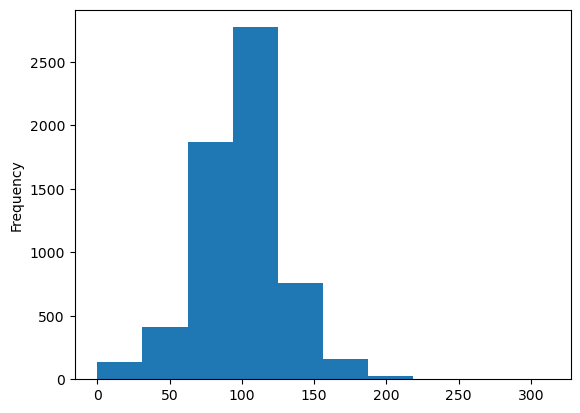

In [13]:
#make histograms with pandas
df_movie['minute'].plot(kind='hist', bins=10)

In [14]:
#get bar ranges with value_counts method and number of bins
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: count, dtype: int64

In [15]:
#dealing with outliers
df_movie[~((df_movie['minute']>31) & (df_movie['minute']<218))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States","September 1, 2021",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,229
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...,13
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12 min,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,s7789,Movie,Power Rangers: Megaforce: The Robo Knight Befo...,James Barr,"Andrew M. Gray, Ciara Hanna, John Mark Louderm...",United States,"January 1, 2016",2013,TV-Y7,24 min,Children & Family Movies,Robo Knight learns the meaning of Christmas fr...,24
7848,s7849,Movie,Refugee,"Clementine Malpas, Leslie Knott","Cate Blanchett, Lynsey Addario, Omar Victor Di...",NaN,"March 10, 2017",2016,TV-PG,24 min,Documentaries,Five acclaimed photographers travel the world ...,24
7891,s7892,Movie,Room on the Broom,"Max Lang, Jani Lachauer","Simon Pegg, Gillian Anderson, Rob Brydon, Mart...","United Kingdom, Germany","July 1, 2019",2012,TV-Y7,26 min,"Children & Family Movies, Independent Movies",A gentle witch with a ginger braid offers ride...,26
7932,s7933,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,228


## 4.2 Using boxplot to identify outliers within numeric data

<Axes: >

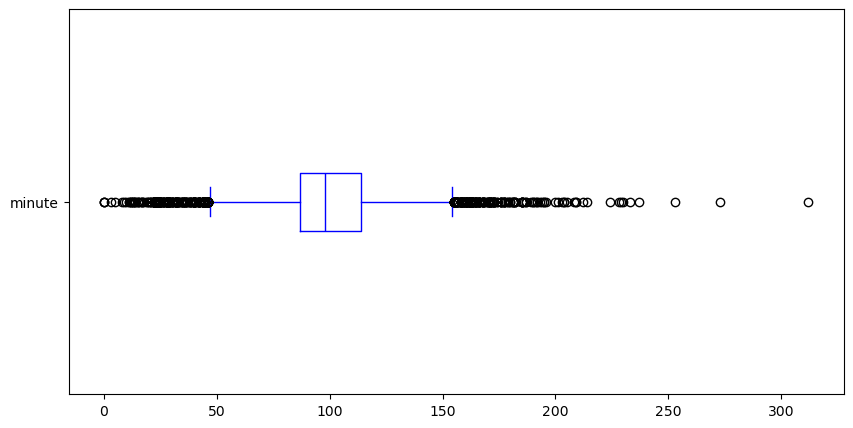

In [16]:
#make a boxplot with pandas
df_movie['minute'].plot(kind='box', vert=False, color='blue', figsize=(10,5))

In [17]:
#overview decriptive statistics
#IQR=Q3-Q1
min_boxplot = 87-1.5*(114-87) #Q1-1.5*IQR
max_boxplot = 114+1.5*(114-87) #Q3+1.5*IQR

print(min_boxplot)
print(max_boxplot)

df_movie['minute']. describe()

46.5
154.5


count    6131.000000
mean       99.528462
std        28.369284
min         0.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: minute, dtype: float64

In [18]:
#dealing with outliers
df_movie[~((df_movie['minute']>46) & (df_movie['minute']<154))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",157


# 4.3 Using bars to identify outliers within categorical data

<Axes: xlabel='rating'>

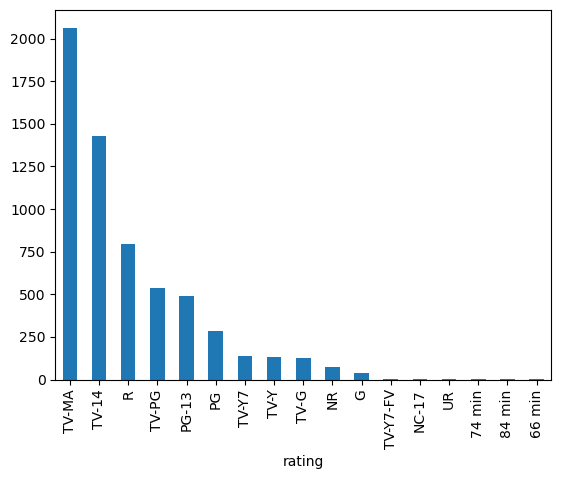

In [19]:
#make barplot with pandas
df_movie['rating'].value_counts().plot(kind='bar')

# 5 Text Normalization
## 5.1 Dealing with inconsistent capitalization - lower(), upper(), title()

In [20]:
#change the case of text with the str attribute
#df_movie['title'].str.lower()
#df_movie['title'].str.upper()
#df_movie['title'].str.title()

#update values
#df_movie['title'] = df_movie['title'].str.upper()
#df_movie
#change the case of text with the upper method()
df_movie['title'] = df_movie['title'].apply(lambda x:x.title())
df_movie

C:\Users\ACER\AppData\Local\Temp\ipykernel_11524\4014288614.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].apply(lambda x:x.title())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


## 5.2 Remove blank spaces() with lstrip(). rstrip() and strip() method

In [21]:
# how the strip method works
movie_title = '  Titanic  ' 

#tream leading space with lstrip()
movie_title.lstrip()

#tream trailing space with rstrip()
movie_title.rstrip()

#tream leading and trailing space with strip()
movie_title.strip()

'Titanic'

In [22]:
# get rid of leading and trailing white spaces with the strip() method
df_movie['title'] = df_movie['title'].str.strip()
df_movie

# get rid of leading and trailing white spaces with the strip() within apply() method
df_movie['title'].apply(lambda x:x.strip())


C:\Users\ACER\AppData\Local\Temp\ipykernel_11524\1216979710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['title'] = df_movie['title'].str.strip()


0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

## 5.3 Replace strings with replace() or sub()

In [ ]:
\w - a-zA-Z 0-9 _
\s - whitespaces
[^\w\s]

In [27]:
# remove punctuations signs with the str.replace() method and regex
#df_movie['title'].str.replace('[^\w\s]', '', regex=True)
# remove punctuations signs with the replace() method and regex
#df_movie['title'].replace('[^\w\s]', '', regex=True)
#df_movie['title'].str.replace('[^\w\s]', '', regex=True)
# remove punctuations signs with the re.sub() method and regex via apply() method
import re
df_movie['title'].apply(lambda x:re.sub('[^\w\s]', '', x))

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object